In [1]:
import numpy as np
import seaborn as sns
import warnings

import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.manifold import TSNE
from umap import UMAP


warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
def read_data(filename: str, delimeter=';'):
    with open(filename, mode="r", newline='') as f:
        features = list()
        targets = list()
        for row in f:
            line = list()
            for s in row.split(delimeter):
                s = s.strip()
                if s:
                    line.append(s)
            
            t = int(line[-1])
            if t < 3:
                t -= 1
                features.append(list(map(float ,line[1:-1])))
                targets.append(t)
    return features, targets

In [3]:
def plot_embeddings(embedded_tsne, targets, support_vectors):
    labels = list(range(np.max(targets)+1))
    palette = np.array(sns.color_palette(n_colors=len(labels)))

    patchs = []
    for i, color in enumerate(palette):
        patchs.append(mpatches.Patch(color=color, label=i))


    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(embedded_tsne[:,0], embedded_tsne[:,1], c=palette[targets])
    plt.legend(handles=patchs, loc='upper right')
    plt.title("Targets")

    plt.subplot(1, 2, 2)
    plt.scatter(support_vectors[:,0], support_vectors[:,1], c=palette[predicted])
    plt.legend(handles=patchs, loc='upper right')
    plt.title("Predictions")

    plt.show()

In [4]:
features, targets = read_data('glass.data', delimeter=',')
features = np.array(features)
features = UMAP().fit_transform(features)
features = StandardScaler().fit_transform(features)

targets = np.array(targets)

In [5]:
np.unique(targets)

array([0, 1])

In [6]:
parameters = {
    'kernel':['poly', 'rbf'],
    'C': np.linspace(1, 20, 21),
    # 'class_weight': ['balanced'],
    # 'degree': np.linspace(2, 15, 14)
}

clf = GridSearchCV(SVC(), parameters)

In [7]:
clf.fit(features, targets)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([ 1.  ,  1.95,  2.9 ,  3.85,  4.8 ,  5.75,  6.7 ,  7.65,  8.6 ,
        9.55, 10.5 , 11.45, 12.4 , 13.35, 14.3 , 15.25, 16.2 , 17.15,
       18.1 , 19.05, 20.  ]),
                         'kernel': ['poly', 'rbf']})

In [8]:
clf.best_params_

{'C': 3.8499999999999996, 'kernel': 'rbf'}

In [9]:
print(classification_report(targets, clf.predict(features), digits=3, zero_division=0))

              precision    recall  f1-score   support

           0      0.821     0.786     0.803        70
           1      0.810     0.842     0.826        76

    accuracy                          0.815       146
   macro avg      0.816     0.814     0.814       146
weighted avg      0.815     0.815     0.815       146



In [10]:
best_svc = SVC(**clf.best_params_)

In [11]:
best_svc.fit(features, targets)

SVC(C=3.8499999999999996)

In [12]:
len(best_svc.support_vectors_)

75

In [13]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [14]:
def plot_contours(model, xx, yy, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out


In [15]:
xx, yy = make_meshgrid(features[:, 0], features[:, 1])

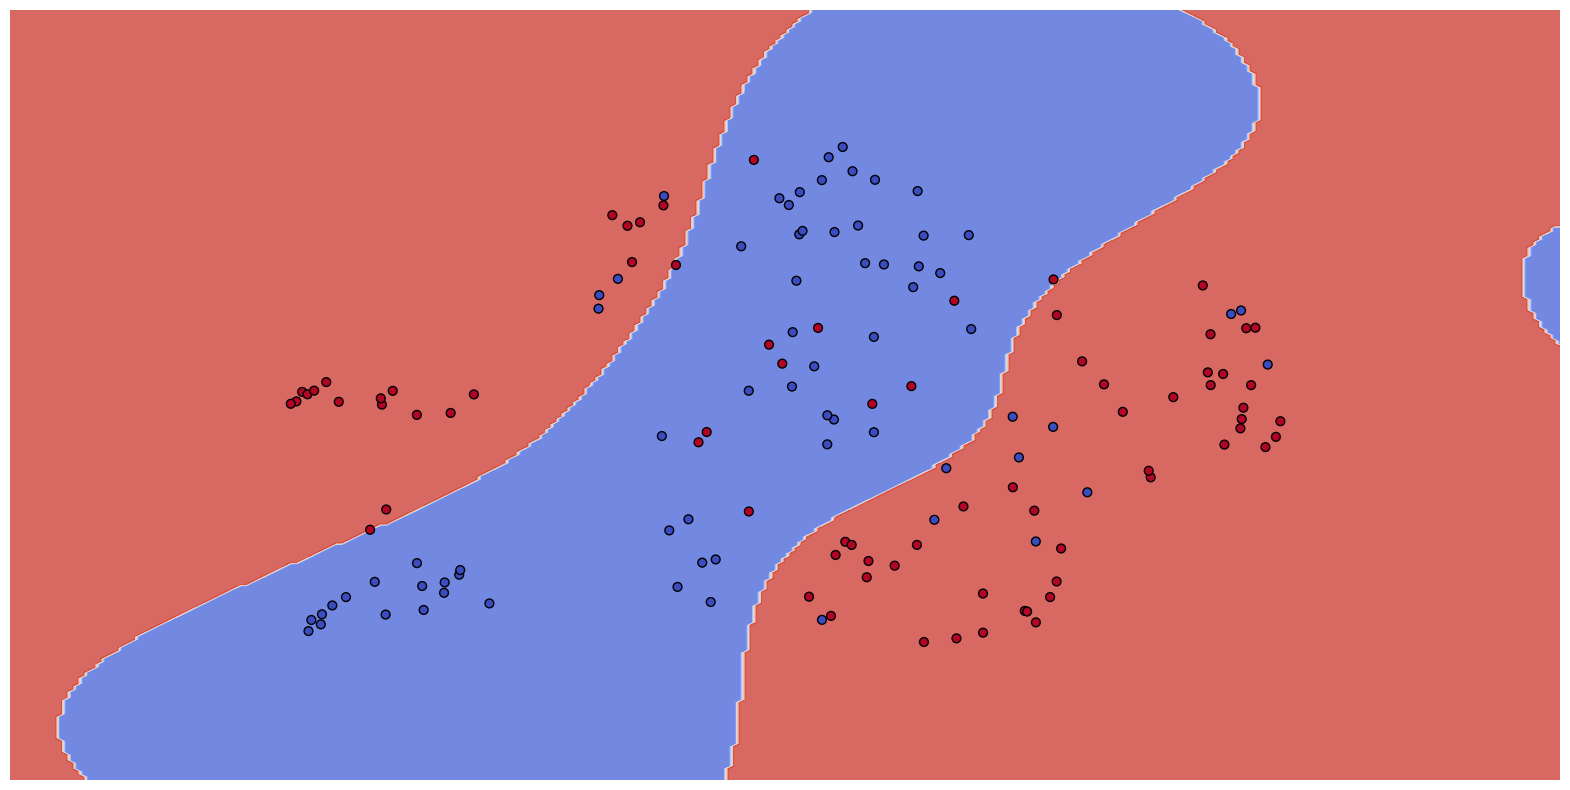

In [16]:
plt.figure(figsize=(20, 10))
colormap = 'coolwarm'
labels = np.unique(targets).tolist()
palette = np.array(sns.color_palette(colormap, n_colors=len(labels)))
cmap = sns.color_palette(colormap, as_cmap=True)

patchs = []
for i, color in enumerate(palette):
    patchs.append(mpatches.Patch(color=color, label=i))
plot_contours(best_svc, xx, yy, cmap=cmap, alpha=0.8)
plt.scatter(features[:, 0], features[:, 1], c=targets, cmap=cmap, s=40, edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis('off')
# plt.legend(handles=patchs, loc='upper right')
plt.show()